In [1]:
import pandas as pd

# Cargar el dataset
file_path = 'datasetLimpio.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para revisar su estructura
data.head()


C:\Users\carli\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\carli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\carli\AppData\Local\Temp/ipykernel_33200/1605285322.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Region,Año,Mes,precipitacion,evaporacion,temperaturaMax,temperaturaMin
0,Region 1,2000,1,0.00,169.075,23.8705,3.5080
1,Region 1,2001,1,0.00,126.650,24.4510,5.4112
2,Region 1,2002,1,34.00,147.560,22.4110,3.9919
3,Region 1,2003,1,2.10,122.300,23.5640,5.4919
4,Region 1,2004,1,35.05,98.600,21.0480,5.6935


In [2]:
# Separar los datos por regiones
regiones = data['Region'].unique()
datasets_por_region = {region: data[data['Region'] == region] for region in regiones}

# Dividir en conjuntos de entrenamiento y prueba
conjuntos_entrenamiento = {}
conjuntos_prueba = {}

for region, dataset in datasets_por_region.items():
    entrenamiento = dataset[(dataset['Año'] >= 2000) & (dataset['Año'] <= 2016)]
    prueba = dataset[(dataset['Año'] >= 2017) & (dataset['Año'] <= 2021)]
    conjuntos_entrenamiento[region] = entrenamiento
    conjuntos_prueba[region] = prueba

# Verificar la cantidad de registros en los conjuntos de entrenamiento y prueba para la primera región como ejemplo
len(conjuntos_entrenamiento[regiones[0]]), len(conjuntos_prueba[regiones[0]])


(204, 60)

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Resultados de los modelos
resultados_rf = {}

for region, entrenamiento in conjuntos_entrenamiento.items():
    # Inicializar lista para guardar resultados de cada iteración
    resultados_temporales = []
    for iteracion in range(30):  # Realizar el proceso 15 veces
        entrenamiento_mensual_seleccionado = pd.DataFrame()
        
        for mes in range(1, 13):  # Para cada mes
            datos_mes = entrenamiento[entrenamiento['Mes'] == mes]
            # Asegurarse de que hay suficientes datos para seleccionar el 80%
            if len(datos_mes) > 0:
                datos_seleccionados, _ = train_test_split(datos_mes, train_size=0.8, shuffle=True)
                entrenamiento_mensual_seleccionado = pd.concat([entrenamiento_mensual_seleccionado, datos_seleccionados])
        
        # Aquí entrenamiento_mensual_seleccionado contiene el 80% de los datos de cada mes
        # Preparar los conjuntos X e y
        X_train = entrenamiento_mensual_seleccionado[['Mes', 'evaporacion', 'temperaturaMax', 'temperaturaMin']]
        y_train = entrenamiento_mensual_seleccionado['precipitacion']
        X_test = conjuntos_prueba[region][['Mes', 'evaporacion', 'temperaturaMax', 'temperaturaMin']]
        y_test = conjuntos_prueba[region]['precipitacion']
        
        # Entrenar el modelo Random Forest
        arboles = 50
        rf = RandomForestRegressor(n_estimators=arboles, random_state=42)
        rf.fit(X_train, y_train)
        
        # Predicciones
        predicciones = rf.predict(X_test)
        # Evaluación
        mse = mean_squared_error(y_test, predicciones)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predicciones)
        
        # Guardar resultados de la iteración
        resultados_temporales.append({'RMSE': rmse, 'R2': r2, 'Datos_Evaluacion': len(y_test), 'MSE': mse})
        
    # Procesar los resultados_temporales para resumirlos o elegir el mejor según tu criterio
    # Por ejemplo, puedes calcular el promedio de RMSE y R2 aquí
    resultados_rf[region] = resultados_temporales

# Después del bucle, resultados_rf tendrá los resultados resumidos para cada región

resultados_rf

RF50 = resultados_rf
RF50




{'Region 1': [{'RMSE': 36.70652608969366,
   'R2': 0.632265349996163,
   'Datos_Evaluacion': 60,
   'MSE': 1347.3690575733615},
  {'RMSE': 35.21834787441309,
   'R2': 0.6614787453557589,
   'Datos_Evaluacion': 60,
   'MSE': 1240.3320270031772},
  {'RMSE': 32.761783461179505,
   'R2': 0.7070570471150213,
   'Datos_Evaluacion': 60,
   'MSE': 1073.3344555572148},
  {'RMSE': 36.7585815315673,
   'R2': 0.6312216029957232,
   'Datos_Evaluacion': 60,
   'MSE': 1351.1933162128805},
  {'RMSE': 31.961729275070645,
   'R2': 0.7211898878710516,
   'Datos_Evaluacion': 60,
   'MSE': 1021.5521382529079},
  {'RMSE': 34.43595009034175,
   'R2': 0.6763525993857405,
   'Datos_Evaluacion': 60,
   'MSE': 1185.8346586245077},
  {'RMSE': 30.19183503673362,
   'R2': 0.7512133892266045,
   'Datos_Evaluacion': 60,
   'MSE': 911.546902885336},
  {'RMSE': 37.89724587231118,
   'R2': 0.6080205649012171,
   'Datos_Evaluacion': 60,
   'MSE': 1436.201244706407},
  {'RMSE': 33.08494485624388,
   'R2': 0.70124938074761

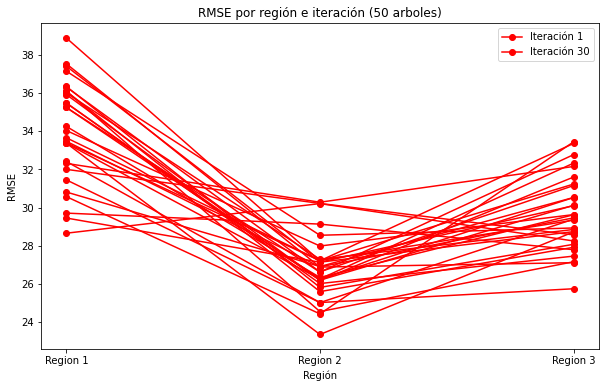

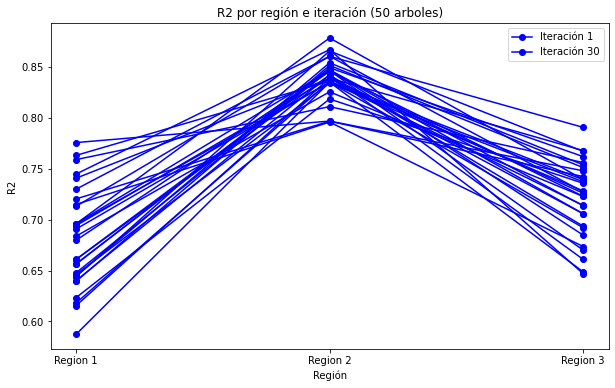

In [18]:
import matplotlib.pyplot as plt

# Nombres de las regiones
nombres_regiones = list(resultados_rf.keys())  # Ajusta según tus nombres de regiones

# Preparar datos para graficar
datos_rmse = {region: [resultado['RMSE'] for resultado in resultados_rf[region]] for region in nombres_regiones}
datos_r2 = {region: [resultado['R2'] for resultado in resultados_rf[region]] for region in nombres_regiones}

# Graficar RMSE
plt.figure(figsize=(10, 6))
for i in range(30):  # Para cada iteración
    valores = [datos_rmse[region][i] for region in nombres_regiones]
    plt.plot(nombres_regiones, valores, '-o',color='red', label=f'Iteración {i+1}' if i in [0, 29] else "")
plt.title(f'RMSE por región e iteración ({arboles} arboles)')
plt.xlabel('Región')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Graficar R2
plt.figure(figsize=(10, 6))
for i in range(30):  # Para cada iteración
    valores = [datos_r2[region][i] for region in nombres_regiones]
    plt.plot(nombres_regiones, valores, '-o',color='blue', label=f'Iteración {i+1}' if i in [0, 29] else "")
plt.title(f'R2 por región e iteración ({arboles} arboles)')
plt.xlabel('Región')
plt.ylabel('R2')
plt.legend()
plt.show()




In [21]:
import numpy as np

resumen = {}

for region, resultados in resultados_rf.items():
    rmses = [resultado['RMSE'] for resultado in resultados]
    promedio_rmse = np.mean(rmses)
    desviacion_estandar_rmse = np.std(rmses)
    resumen[region] = {'Promedio RMSE': promedio_rmse, 'Desviación Estándar RMSE': desviacion_estandar_rmse}

resumen

{'Region 1': {'Promedio RMSE': 33.55799214809298,
  'Desviación Estándar RMSE': 1.8541097988801367},
 'Region 2': {'Promedio RMSE': 27.36318856592583,
  'Desviación Estándar RMSE': 2.213362973589644},
 'Region 3': {'Promedio RMSE': 29.979137508953507,
  'Desviación Estándar RMSE': 1.6146687844541918}}

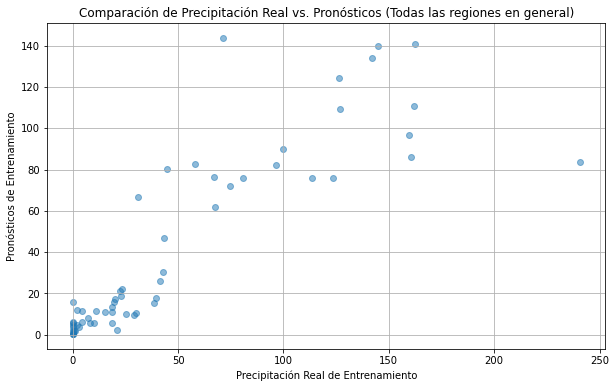

In [27]:
import matplotlib.pyplot as plt
# Gráfico de precipitación de entrenamiento vs. pronósticos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicciones, alpha=0.5)
plt.title('Comparación de Precipitación Real vs. Pronósticos (Todas las regiones en general)')
plt.xlabel('Precipitación Real de Entrenamiento')
plt.ylabel('Pronósticos de Entrenamiento')
plt.grid(True)
plt.show()

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Resultados de los modelos GBM
resultados_gbm = {}

for region, entrenamiento in conjuntos_entrenamiento.items():
    resultados_temporales = []
    
    for iteracion in range(30):  # Realizar el proceso 15 veces
        entrenamiento_mensual_seleccionado = pd.DataFrame()
        
        for mes in range(1, 13):  # Para cada mes
            datos_mes = entrenamiento[entrenamiento['Mes'] == mes]
            # Asegurarse de que hay suficientes datos para seleccionar el 80%
            if len(datos_mes) > 0:
                datos_seleccionados, _ = train_test_split(datos_mes, train_size=0.8, shuffle=True)
                entrenamiento_mensual_seleccionado = pd.concat([entrenamiento_mensual_seleccionado, datos_seleccionados])
                
        # Preparar los conjuntos X e y excluyendo NaN
        X_train = entrenamiento_mensual_seleccionado[['Mes', 'evaporacion', 'temperaturaMax', 'temperaturaMin']]
        y_train = entrenamiento_mensual_seleccionado['precipitacion']
        X_test = conjuntos_prueba[region][['Mes', 'evaporacion', 'temperaturaMax', 'temperaturaMin']]
        y_test = conjuntos_prueba[region]['precipitacion']

        # Verificar si hay suficientes datos para continuar

        # Entrenar el modelo GBM
        arboles = 50
        gbm = GradientBoostingRegressor(n_estimators=arboles, learning_rate=0.1, random_state=42)
        gbm.fit(X_train, y_train)

        # Predicciones
        predicciones_gbm = gbm.predict(X_test)
        trainPrediction = gbm.predict(X_train)
        
        # Evaluación
        mse_gbm = mean_squared_error(y_test, predicciones_gbm) # Aquí calculamos el MSE
        rmse_gbm = np.sqrt(mse_gbm)
        r2_gbm = r2_score(y_test, predicciones_gbm)
        
        # Guardar resultados de la iteración
        resultados_temporales.append({'RMSE': rmse_gbm, 'R2': r2_gbm, 'Datos_Evaluacion': len(y_test), 'MSE': mse_gbm})
        
    # Procesar los resultados_temporales para resumirlos o elegir el mejor según tu criterio
    # Por ejemplo, puedes calcular el promedio de RMSE y R2 aquí
    resultados_gbm[region] = resultados_temporales

resultados_gbm

GBM50 = resultados_gbm


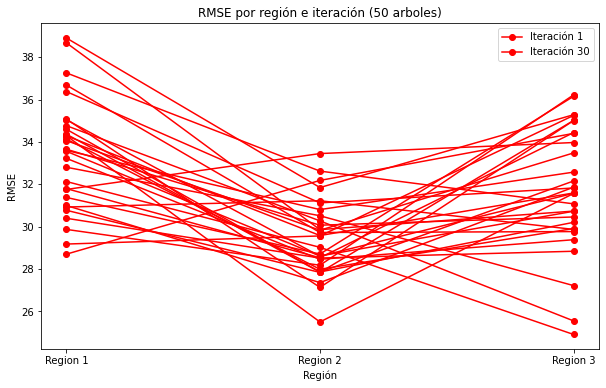

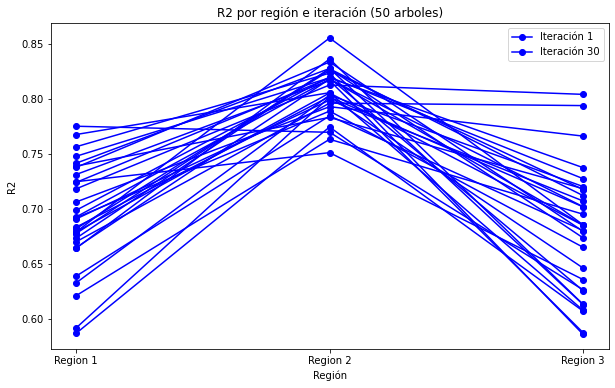

In [26]:
import matplotlib.pyplot as plt

# Nombres de las regiones
nombres_regiones = list(resultados_rf.keys())  # Ajusta según tus nombres de regiones

# Preparar datos para graficar
datos_rmse = {region: [resultado['RMSE'] for resultado in resultados_gbm[region]] for region in nombres_regiones}
datos_r2 = {region: [resultado['R2'] for resultado in resultados_gbm[region]] for region in nombres_regiones}

# Graficar RMSE
plt.figure(figsize=(10, 6))
for i in range(30):  # Para cada iteración
    valores = [datos_rmse[region][i] for region in nombres_regiones]
    plt.plot(nombres_regiones, valores, '-o',color='red', label=f'Iteración {i+1}' if i in [0, 29] else "")
plt.title(f'RMSE por región e iteración ({arboles} arboles)')
plt.xlabel('Región')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Graficar R2
plt.figure(figsize=(10, 6))
for i in range(30):  # Para cada iteración
    valores = [datos_r2[region][i] for region in nombres_regiones]
    plt.plot(nombres_regiones, valores, '-o',color='blue', label=f'Iteración {i+1}' if i in [0, 29] else "")
plt.title(f'R2 por región e iteración ({arboles} arboles)')
plt.xlabel('Región')
plt.ylabel('R2')
plt.legend()
plt.show()

In [34]:
import numpy as np

resumen = {}

for region, resultados in resultados_gbm.items():
    rmses = [resultado['RMSE'] for resultado in resultados]
    promedio_rmse = np.mean(rmses)
    desviacion_estandar_rmse = np.std(rmses)
    resumen[region] = {'Promedio RMSE': promedio_rmse, 'Desviación Estándar RMSE': desviacion_estandar_rmse}

resumen

{'Region 1': {'Promedio RMSE': 39.350313521682146,
  'Desviación Estándar RMSE': 4.51012640644944},
 'Region 2': {'Promedio RMSE': 33.03494108285461,
  'Desviación Estándar RMSE': 2.1395061553587915},
 'Region 3': {'Promedio RMSE': 31.043124168660416,
  'Desviación Estándar RMSE': 1.9834584066002174}}

In [11]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Resultados de los modelos de Redes Neuronales
resultados_nn_SS = {}

for region, entrenamiento in conjuntos_entrenamiento.items():
    resultados_temporales = []
    
    for iteracion in range(30):  # Realizar el proceso 15 veces
        entrenamiento_mensual_seleccionado = pd.DataFrame()
        
        for mes in range(1, 13):  # Para cada mes
            datos_mes = entrenamiento[entrenamiento['Mes'] == mes]
            # Asegurarse de que hay suficientes datos para seleccionar el 80%
            if len(datos_mes) > 0:
                datos_seleccionados, _ = train_test_split(datos_mes, train_size=0.8, shuffle=True)
                entrenamiento_mensual_seleccionado = pd.concat([entrenamiento_mensual_seleccionado, datos_seleccionados])
                
        # Preparar los conjuntos X e y excluyendo NaN
        X_train = entrenamiento_mensual_seleccionado[['Mes', 'evaporacion', 'temperaturaMax', 'temperaturaMin']]
        y_train = entrenamiento_mensual_seleccionado['precipitacion']
        X_test = conjuntos_prueba[region][['Mes', 'evaporacion', 'temperaturaMax', 'temperaturaMin']]
        y_test = conjuntos_prueba[region]['precipitacion']
    
        # Normalización de los datos
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Construcción del modelo de Redes Neuronales
        model = Sequential([
            Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
            Dense(64, activation='relu'),
            Dense(1)
        ])

        # Compilación del modelo
        model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

        # Entrenamiento del modelo
        model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

        # Predicciones
        predicciones_nn = model.predict(X_test_scaled).flatten()

        # Evaluación
        mse_nn = mean_squared_error(y_test, predicciones_nn) # Aquí calculamos el MSE
        rmse_nn = np.sqrt(mse_nn)
        r2_nn = r2_score(y_test, predicciones_nn)

       # Guardar resultados de la iteración
        resultados_temporales.append({'RMSE': rmse_nn, 'R2': r2_nn, 'Datos_Evaluacion': len(y_test), 'MSE': mse_nn})
        
    # Procesar los resultados_temporales para resumirlos o elegir el mejor según tu criterio
    # Por ejemplo, puedes calcular el promedio de RMSE y R2 aquí
    resultados_nn_SS[region] = resultados_temporales
    
resultados_nn_SS

NN2C64N = resultados_nn_SS

2/2 [==============================] - 0s 3ms/step


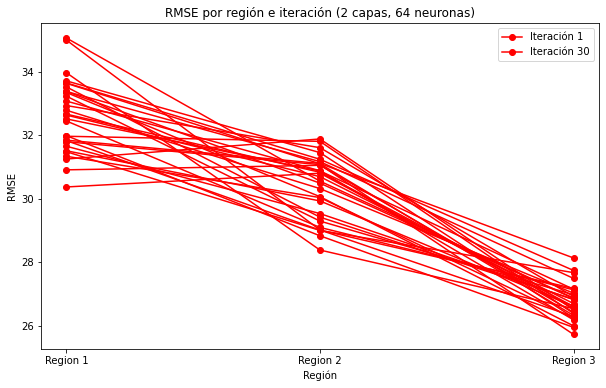

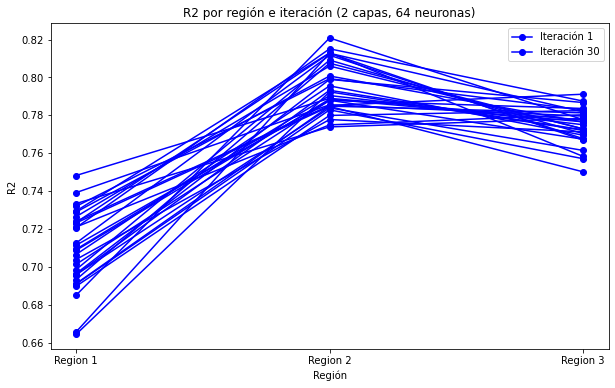

In [12]:
import matplotlib.pyplot as plt

# Nombres de las regiones
nombres_regiones = list(resultados_rf.keys())  # Ajusta según tus nombres de regiones

# Preparar datos para graficar
datos_rmse = {region: [resultado['RMSE'] for resultado in resultados_nn_SS[region]] for region in nombres_regiones}
datos_r2 = {region: [resultado['R2'] for resultado in resultados_nn_SS[region]] for region in nombres_regiones}

# Graficar RMSE
plt.figure(figsize=(10, 6))
for i in range(30):  # Para cada iteración
    valores = [datos_rmse[region][i] for region in nombres_regiones]
    plt.plot(nombres_regiones, valores, '-o',color='red', label=f'Iteración {i+1}' if i in [0, 29] else "")
plt.title('RMSE por región e iteración (2 capas, 64 neuronas)')
plt.xlabel('Región')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Graficar R2
plt.figure(figsize=(10, 6))
for i in range(30):  # Para cada iteración
    valores = [datos_r2[region][i] for region in nombres_regiones]
    plt.plot(nombres_regiones, valores, '-o',color='blue', label=f'Iteración {i+1}' if i in [0, 29] else "")
plt.title('R2 por región e iteración (2 capas, 64 neuronas)')
plt.xlabel('Región')
plt.ylabel('R2')
plt.legend()
plt.show()

In [55]:
import numpy as np

resumen = {}

for region, resultados in NN3C64N.items():
    rmses = [resultado['RMSE'] for resultado in resultados]
    promedio_rmse = np.mean(rmses)
    desviacion_estandar_rmse = np.std(rmses)
    resumen[region] = {'Promedio RMSE': promedio_rmse, 'Desviación Estándar RMSE': desviacion_estandar_rmse}

resumen
NN3C64N_Final = resumen

In [15]:
RF50_Final

{'Region 1': {'Promedio RMSE': 34.05839169818903,
  'Desviación Estándar RMSE': 2.5376029648471214},
 'Region 2': {'Promedio RMSE': 27.44537658902437,
  'Desviación Estándar RMSE': 2.0942030161258844},
 'Region 3': {'Promedio RMSE': 29.789436964430614,
  'Desviación Estándar RMSE': 2.044920595489895}}

In [2]:
import pandas as pd

# Creación del DataFrame para almacenar los resultados
columnas = ['Algoritmo', 'Region 1', 'Region 2', 'Region 3']
resultados_df = pd.DataFrame(columns=columnas)

# Datos proporcionados
datos = {
    "RF50": RF50_Final,
    "RF100": RF100_Final,
    "RF150": RF150_Final,
    "RF200": RF200_Final,
    "GBM50": GBM50_Final,
    "GBM100": GBM100_Final,
    "GBM150": GBM150_Final,
    "GBM200": GBM200_Final,
    "NN2C64N": NN2C64N_Final,
    "NN2C128N": NN2C128N_Final,
    "NN3C128N": NN3C128N_Final,
    "NN3C64N": NN3C64N_Final
}

# Función para formatear los resultados como "Promedio (Desviación Estándar)"
def format_result(promedio, desviacion):
    return f"{promedio:.2f} ({desviacion:.2f})"

for alg, regions in datos.items():
    new_row = {
        'Algoritmo': alg,
        'Region 1': format_result(regions['Region 1']['Promedio RMSE'], regions['Region 1']['Desviación Estándar RMSE']),
        'Region 2': format_result(regions['Region 2']['Promedio RMSE'], regions['Region 2']['Desviación Estándar RMSE']),
        'Region 3': format_result(regions['Region 3']['Promedio RMSE'], regions['Region 3']['Desviación Estándar RMSE'])
    }
    resultados_df = pd.concat([resultados_df, pd.DataFrame([new_row])], ignore_index=True)

resultados_df



NameError: name 'RF50_Final' is not defined

In [28]:
# Re-importar las librerías necesarias tras el reinicio del entorno de ejecución
import pandas as pd

# Función para procesar los datos de un algoritmo y convertirlos en un DataFrame
def process_algorithm_data(data, algorithm_name):
    # Lista para almacenar los datos procesados
    processed_data = []
    
    # Iterar sobre cada región en los datos
    for region, evaluations in data.items():
        # Extraer el número de región de la cadena de texto (e.g., "Region 1" -> 1)
        region_number = region.split()[1]
        
        # Iterar sobre cada evaluación en la región
        for evaluation in evaluations:
            processed_data.append({
                "Region": region_number,
                "Algoritmo": algorithm_name,
                "RMSE": evaluation["RMSE"],
                "R2": evaluation["R2"]
            })
    
    # Convertir la lista de datos procesados en un DataFrame
    return pd.DataFrame(processed_data)


datos = {
    "RF50": RF50,
    "RF100": RF100,
    "RF150": RF150,
    "RF200": RF200,
    "GBM50": GBM50,
    "GBM100": GBM100,
    "GBM150": GBM150,
    "GBM200": GBM200,
    "NN2C64N": NN2C64N,
    "NN2C128N": NN2C128N,
    "NN3C128N": NN3C128N,
    "NN3C64N": NN3C64N
}

# Lista vacía para almacenar los DataFrames temporales
df_list = []

# Iterar sobre cada algoritmo y su conjunto de datos
for algorithm_name, data in datos.items():
    # Procesar el conjunto de datos del algoritmo
    df_temp = process_algorithm_data(data, algorithm_name)
    # Añadir el DataFrame resultante a la lista
    df_list.append(df_temp)

# Combinar todos los DataFrames en uno solo
final_df = pd.concat(df_list, ignore_index=True)

# Mostrar las primeras filas del DataFrame final
final_df.head()


,Region,Algoritmo,RMSE,R2
0,1,RF50,31.453414,0.729988
1,1,RF50,32.316876,0.714959
2,1,RF50,35.247484,0.660918
3,1,RF50,30.816849,0.740806
4,1,RF50,29.453865,0.763227


In [30]:
final_df.to_csv('resultados_algoritmos.csv', index=False)


In [32]:
# Verificar si hay valores infinitos o NaNs en los datos
inf_or_nan = final_df.isin([np.inf, -np.inf]).any() | final_df.isna().any()
inf_or_nan

Region       False
Algoritmo    False
RMSE         False
R2           False
dtype: bool

In [34]:

from statsmodels.formula.api import ols
import statsmodels.api as sm


# ANOVA para el efecto de los algoritmos
model_algoritmo = ols('RMSE ~ C(Algoritmo)', data=final_df).fit()
anova_algoritmo = sm.stats.anova_lm(model_algoritmo, typ=2)

# ANOVA para el efecto de las regiones
model_region = ols('RMSE ~ C(Region)', data=final_df).fit()
anova_region = sm.stats.anova_lm(model_region, typ=2)

anova_algoritmo, anova_region




(                    sum_sq      df          F         PR(>F)
 C(Algoritmo)   9862.904555    11.0  86.325919  3.743037e-139
 Residual      11092.825667  1068.0        NaN            NaN,
                  sum_sq      df           F        PR(>F)
 C(Region)   5757.417225     2.0  203.994297  7.503385e-76
 Residual   15198.312997  1077.0         NaN           NaN)

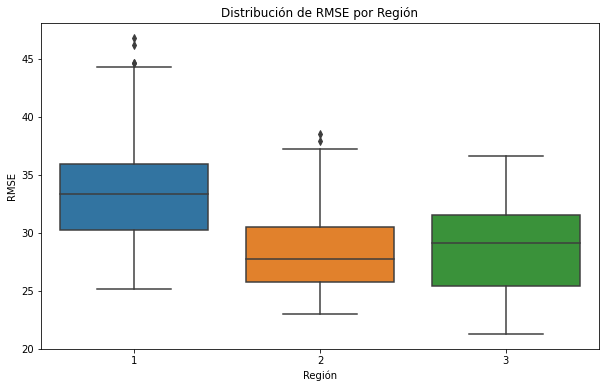

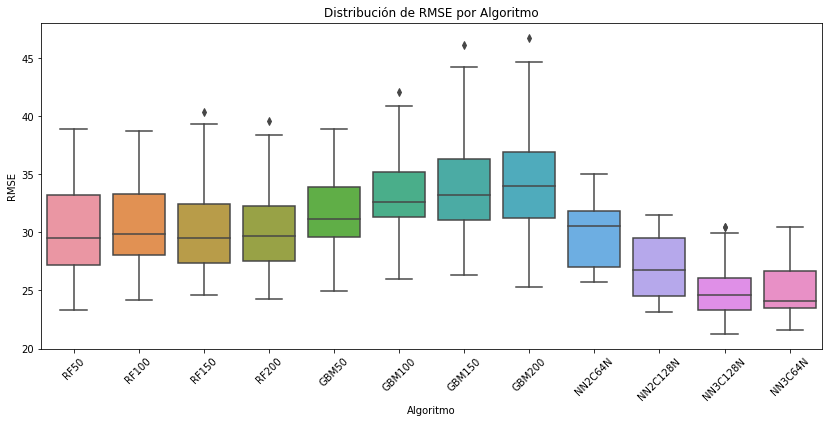

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Primer gráfico: Boxplot por región
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='RMSE', data=final_df)
plt.title('Distribución de RMSE por Región')
plt.xlabel('Región')
plt.ylabel('RMSE')
plt.show()

# Segundo gráfico: Boxplot por algoritmo
plt.figure(figsize=(14, 6))
sns.boxplot(x='Algoritmo', y='RMSE', data=final_df)
plt.title('Distribución de RMSE por Algoritmo')
plt.xticks(rotation=45)  # Rotar las etiquetas para mejor lectura
plt.xlabel('Algoritmo')
plt.ylabel('RMSE')
plt.show()

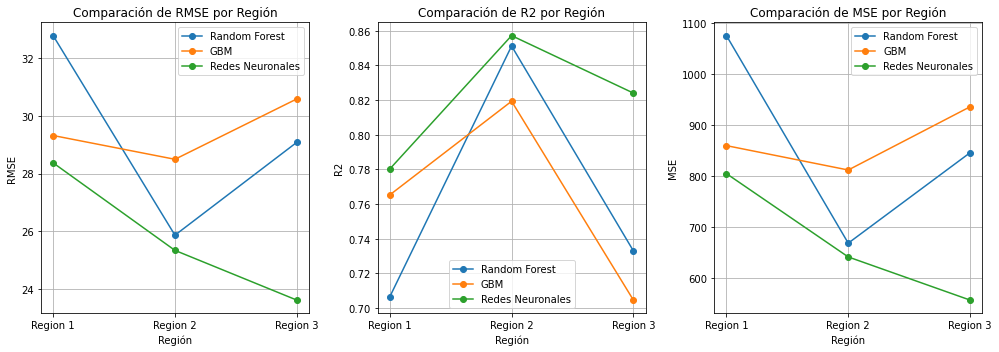

In [18]:
import matplotlib.pyplot as plt

# Extraer los datos de los diccionarios de resultados
modelos = ['Random Forest', 'GBM', 'Redes Neuronales']
regiones = ['Region 1', 'Region 2', 'Region 3']

rmse_datos = {
    modelo: [resultados[region]['RMSE'] for region in regiones]
    for modelo, resultados in zip(modelos, [resultados_rf, resultados_gbm, resultados_nn_SS])
}

r2_datos = {
    modelo: [resultados[region]['R2'] for region in regiones]
    for modelo, resultados in zip(modelos, [resultados_rf, resultados_gbm, resultados_nn_SS])
}

mse_datos = {
    modelo: [resultados[region]['MSE'] for region in regiones]
    for modelo, resultados in zip(modelos, [resultados_rf, resultados_gbm, resultados_nn_SS])
}

# Configuración de los gráficos con datos dinámicos
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# RMSE
for modelo in modelos:
    axs[0].plot(regiones, rmse_datos[modelo], marker='o', label=modelo)
axs[0].set_title('Comparación de RMSE por Región')
axs[0].set_xlabel('Región')
axs[0].set_ylabel('RMSE')
axs[0].grid(True)
axs[0].legend()

# R2
for modelo in modelos:
    axs[1].plot(regiones, r2_datos[modelo], marker='o', label=modelo)
axs[1].set_title('Comparación de R2 por Región')
axs[1].set_xlabel('Región')
axs[1].set_ylabel('R2')
axs[1].grid(True)
axs[1].legend()

# MSE
for modelo in modelos:
    axs[2].plot(regiones, mse_datos[modelo], marker='o', label=modelo)
axs[2].set_title('Comparación de MSE por Región')
axs[2].set_xlabel('Región')
axs[2].set_ylabel('MSE')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd

# Datos proporcionados
datos_rf = {
    'Region 1': {'RMSE': 32.4204955665627, 'R2': 0.7131285808050327, 'Datos_Evaluacion': 60},
    'Region 2': {'RMSE': 26.904090395891615, 'R2': 0.8390088844672612, 'Datos_Evaluacion': 60},
    'Region 3': {'RMSE': 29.257691127289146, 'R2': 0.729854312928902, 'Datos_Evaluacion': 60}
}

datos_gbm = {
    'Region 1': {'RMSE': 31.18104221824656, 'R2': 0.734643800509624, 'Datos_Evaluacion': 60},
    'Region 2': {'RMSE': 31.599753017232633, 'R2': 0.777908130912317, 'Datos_Evaluacion': 60},
    'Region 3': {'RMSE': 30.8820221816491, 'R2': 0.6990257104609237, 'Datos_Evaluacion': 60}
}

# Convertir los datos a DataFrame para comparación
columnas = ['Region', 'Modelo', 'RMSE', 'R2', 'Datos_Evaluacion']
datos = []

for region, metricas in resultados_rf.items():
    datos.append([region, 'Random Forest', metricas['RMSE'], metricas['R2'], metricas['Datos_Evaluacion']])

for region, metricas in resultados_gbm.items():
    datos.append([region, 'GBM', metricas['RMSE'], metricas['R2'], metricas['Datos_Evaluacion']])
    
for region, metricas in resultados_nn_SS.items():
    datos.append([region, 'RNN', metricas['RMSE'], metricas['R2'], metricas['Datos_Evaluacion']])

df_comparativo = pd.DataFrame(datos, columns=columnas)

df_comparativo

,Region,Modelo,RMSE,R2,Datos_Evaluacion
0,Region 1,Random Forest,32.792047,0.706516,60
1,Region 2,Random Forest,25.863714,0.851219,60
2,Region 3,Random Forest,29.086250,0.733011,60
3,Region 1,GBM,29.324052,0.765309,60
4,Region 2,GBM,28.498433,0.819363,60
5,Region 3,GBM,30.593102,0.704631,60
6,Region 1,RNN,28.374678,0.780260,60
7,Region 2,RNN,25.336385,0.857224,60
8,Region 3,RNN,23.610673,0.824072,60
